In [8]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [9]:
query = '(from:Ishansharma7390) until:2022-12-13 since:2021-12-13 -filter:links -filter:replies'

In [10]:
tweets = []

In [11]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    tweets.append([tweet.date, tweet.content])

In [12]:
df = pd.DataFrame(tweets, columns = ['Date', 'Tweet'])
df

,Date,Tweet
0,2022-12-12 05:13:19+00:00,"It is the meaninglessness of suffering, and no..."
1,2022-12-11 15:39:58+00:00,What do you like doing while you're on a fligh...
2,2022-12-11 15:11:39+00:00,What new thing did you learn today?👀
3,2022-12-11 04:26:56+00:00,You are the average of the 5 creators you watch.
4,2022-12-10 14:49:22+00:00,My plane took off exactly when it was supposed...
...,...,...
862,2021-12-14 16:44:28+00:00,No amount of manifestation or law of attractio...
863,2021-12-14 13:42:30+00:00,"What do you think about quotes like ""Netflix d..."
864,2021-12-13 14:52:33+00:00,What's your fav business podcast?
865,2021-12-13 13:40:16+00:00,Note to self: never buy a 256gb mac again.


In [13]:
def clean(s):
    s = re.sub(r'@[A-Za-z0-9]+', '', s)
    s = re.sub(r'#', '', s)
    s = re.sub(r'RT[\s]+', '', s)
    s = re.sub(r'https?:\/\/\S+', '', s)
    return s

df['Tweet'] = df['Tweet'].str.strip().apply(clean)
df.head(10)

,Date,Tweet
0,2022-12-12 05:13:19+00:00,"It is the meaninglessness of suffering, and no..."
1,2022-12-11 15:39:58+00:00,What do you like doing while you're on a fligh...
2,2022-12-11 15:11:39+00:00,What new thing did you learn today?👀
3,2022-12-11 04:26:56+00:00,You are the average of the 5 creators you watch.
4,2022-12-10 14:49:22+00:00,My plane took off exactly when it was supposed...
5,2022-12-10 11:58:38+00:00,"People will tell you to be ""realistic""\n\nTo d..."
6,2022-12-10 09:05:34+00:00,Hard times create strong men.\n\nStrong men cr...
7,2022-12-10 08:50:08+00:00,American Psycho accurately depicts everything ...
8,2022-12-09 15:18:24+00:00,rented success is temporary.
9,2022-12-09 09:32:35+00:00,dream in decades.\nact today.


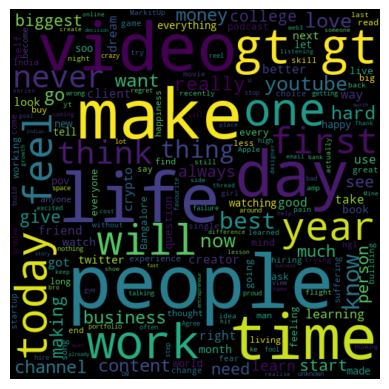

In [14]:
words = ' '.join([x for x in df['Tweet']])
wc = WordCloud(width=500, height=500, random_state=21, max_font_size=100).generate(words)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()